In [39]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
query = """
SELECT nc.npi,
        organization_name,
        first_name,
        last_name,
        nc.communityid,
        t.grouping,
        t.classification,
        t.specialization,
        entity_type_code
        
FROM npi_community AS nc
INNER JOIN npidata AS nd
USING(npi)
INNER JOIN taxonomy AS t
USING(taxonomy_code);

"""

In [6]:
with sqlite3.connect('./data/hop_db.sqlite') as db: 
    df = pd.read_sql(query, db)

In [7]:
df.head()

,npi,organization_name,first_name,last_name,communityid,grouping,classification,specialization,entity_type_code
0,1922001957,None,RICHARD,PRESLEY,6531,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,None,1
1,1013910892,None,EMIKO,LEJEUNE,2330,"Speech, Language and Hearing Service Providers",Audiologist,None,1
2,1154324192,None,ELIZABETH,OLDFIELD,6531,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,None,1
3,1235132408,None,LEWIS,BELLARDO,6531,Allopathic & Osteopathic Physicians,Obstetrics & Gynecology,None,1
4,1225031461,None,VARALAXMI,DASARI,6531,Allopathic & Osteopathic Physicians,Radiology,Diagnostic Radiology,1


In [78]:
graph_data = pd.DataFrame(   df[['communityid']]
                            .groupby('communityid')
                            .value_counts()[:20]
                        ).reset_index().rename(columns = {0:'Number_of_NPIs', 'communityid':'Community_ID'})

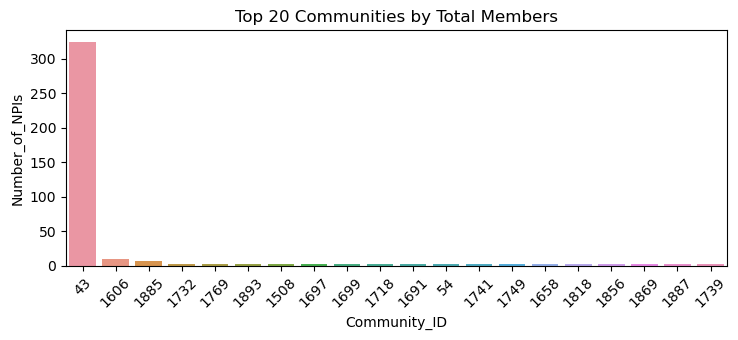

In [79]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

sns.barplot(
                data = graph_data,
                x = 'Community_ID',
                y = 'Number_of_NPIs',
                order = graph_data.sort_values('Number_of_NPIs', ascending=False).Community_ID
            )
plt.xticks(rotation=45)
plt.title('Top 20 Communities by Total Members')
plt.show()

There seems to bee only one big community of providers. Group 43 has the largest network by a mile, with 325 providers. The next highest group is 1606 with 9 providers. 